In [1]:
import pandas as pd
import html
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("../data/WikiArt-Emotions-Clean.csv")

In [3]:
df

,ID,Style,Movement,Artist,Title,Year,Year_2,Painting_Y_N,Face-body,Avg_rating,IT_gratitude,IT_happiness,IT_humility,IT_love,IT_optimism,IT_trust,IT_agreeableness,IT_anticipation,IT_disagreeableness,IT_shyness,IT_surprise,IT_neutral,IT_anger,IT_arrogance,IT_disgust,IT_fear,IT_pessimism,IT_regret,IT_sadness,IT_shame,I_gratitude,I_happiness,I_humility,I_love,I_optimism,I_trust,I_agreeableness,I_anticipation,I_disagreeableness,I_shyness,I_surprise,I_neutral,I_anger,I_arrogance,I_disgust,I_fear,I_pessimism,I_regret,I_sadness,I_shame,T_gratitude,T_happiness,T_humility,T_love,T_optimism,T_trust,T_agreeableness,T_anticipation,T_disagreeableness,T_shyness,T_surprise,T_neutral,T_anger,T_arrogance,T_disgust,T_fear,T_pessimism,T_regret,T_sadness,T_shame,Avg_pos,Avg_neu,Avg_neg
0,58c6237dedc2c9c7dc0de1ae,Modern Art,Impressionism,Charles Courtney Curran,In the Luxembourg Garden,1889,1889,yes,face,2.33,0.131,0.750,0.357,0.357,0.333,0.274,0.036,0.071,0.012,0.012,0.048,0.000,0.012,0.012,0.000,0.036,0.048,0.024,0.131,0.000,0.119,0.726,0.369,0.250,0.274,0.250,0.060,0.071,0.012,0.024,0.024,0.0,0.012,0.024,0.000,0.012,0.012,0.000,0.131,0.000,0.107,0.714,0.190,0.155,0.238,0.155,0.060,0.179,0.012,0.000,0.048,0.000,0.012,0.000,0.012,0.000,0.024,0.012,0.024,0.012,0.367,0.050,0.012
1,577280dfedc2cb3880f28e76,Modern Art,Neo-Expressionism,Keith Haring,The Marriage of Heaven and Hell,1984,1984,yes,body,0.70,0.000,0.100,0.000,0.100,0.100,0.100,0.000,0.500,0.400,0.000,0.500,0.000,0.000,0.000,0.100,0.300,0.200,0.100,0.100,0.000,0.000,0.100,0.100,0.000,0.200,0.000,0.000,0.100,0.000,0.000,0.500,0.0,0.000,0.000,0.100,0.300,0.200,0.100,0.200,0.000,0.000,0.300,0.000,0.200,0.000,0.000,0.000,0.600,0.300,0.000,0.200,0.000,0.000,0.000,0.000,0.200,0.100,0.000,0.000,0.000,0.067,0.183,0.038
2,57727f2dedc2cb3880ed5fa9,Modern Art,Post-Impressionism,Jozsef Rippl-Ronai,Uncle Piacsek in front of the Black Sideboard,1906,1906,yes,face,1.60,0.000,0.500,0.500,0.000,0.300,0.300,0.000,0.200,0.000,0.000,0.100,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.100,0.500,0.300,0.000,0.300,0.200,0.000,0.200,0.000,0.000,0.100,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.200,0.400,0.000,0.000,0.100,0.000,0.600,0.000,0.000,0.100,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.267,0.117,0.000
3,58d1240cedc2c94f900fc610,Modern Art,Cubism,Vadym Meller,Monk. For the Play 'Mazeppa',1920,1920,yes,face,0.82,0.000,0.091,0.182,0.000,0.091,0.000,0.000,0.091,0.000,0.091,0.182,0.000,0.000,0.000,0.091,0.091,0.091,0.091,0.273,0.000,0.000,0.091,0.091,0.000,0.000,0.000,0.000,0.091,0.000,0.000,0.273,0.0,0.000,0.000,0.091,0.000,0.182,0.000,0.364,0.000,0.000,0.091,0.364,0.091,0.091,0.091,0.000,0.273,0.000,0.091,0.182,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.091,0.000,0.061,0.091,0.011
4,57727de7edc2cb3880e91f26,Post Renaissance Art,Romanticism,David Wilkie,The Defence of Saragoça,1828,1828,yes,face,1.69,0.154,0.154,0.077,0.077,0.231,0.538,0.077,0.154,0.308,0.077,0.077,0.000,0.231,0.231,0.231,0.308,0.154,0.154,0.231,0.154,0.231,0.154,0.077,0.077,0.231,0.231,0.077,0.077,0.308,0.077,0.154,0.0,0.077,0.231,0.308,0.308,0.231,0.077,0.231,0.154,0.077,0.077,0.154,0.077,0.231,0.385,0.154,0.231,0.308,0.077,0.154,0.000,0.308,0.077,0.077,0.231,0.077,0.077,0.154,0.077,0.205,0.154,0.135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4100,577287aeedc2cb388007fba9,Modern Art,Color-Field-Painting,Rupprecht Geiger,OE 260,1957,1957,yes,none,1.09,0.000,0.091,0.091,0.000,0.273,0.091,0.000,0.273,0.000,0.000,0.091,0.091,0.000,0.000,0.000,0.000,0.091,0.000,0.091,0.000,0.000,0.091,0.091,0.000,0.182,0.091,0.000,0.273,0.000,0.000,0.182,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.273,0.000,0.000,0.000,0.000,0.000,0.091,0.000,0.000,0.545,0.000,0.091,0.000,0.182,

# Movement

In [4]:
def movement_avg_distances(df):
    df_avg = df.groupby('Movement').agg({
        'IT_gratitude': 'mean',
        'IT_happiness': 'mean',
        'IT_humility': 'mean',
        'IT_love': 'mean',
        'IT_optimism': 'mean',
        'IT_trust': 'mean',
        'IT_agreeableness': 'mean',
        'IT_anticipation': 'mean',
        'IT_disagreeableness': 'mean',
        'IT_shyness': 'mean',
        'IT_surprise': 'mean',
        'IT_neutral': 'mean',
        'IT_anger': 'mean',
        'IT_arrogance': 'mean',
        'IT_disgust': 'mean',
        'IT_fear': 'mean',
        'IT_pessimism': 'mean',
        'IT_regret': 'mean',
        'IT_sadness': 'mean',
        'IT_shame': 'mean',
    }).reset_index()

    df_avg['Pos_avg'] = df_avg[['IT_gratitude', 'IT_happiness', 'IT_humility', 'IT_love', 'IT_optimism', 'IT_trust']].mean(axis=1).round(3)
    df_avg['Neu_avg'] = df_avg[['IT_agreeableness', 'IT_anticipation', 'IT_disagreeableness', 'IT_shyness', 'IT_surprise', 'IT_neutral']].mean(axis=1).round(3)
    df_avg['Neg_avg'] = df_avg[['IT_anger', 'IT_arrogance', 'IT_disgust', 'IT_fear', 'IT_pessimism', 'IT_regret', 'IT_sadness', 'IT_shame']].mean(axis=1).round(3)

    df = df_avg[['Movement', 'Pos_avg', 'Neu_avg', 'Neg_avg']]
    
    return df

In [5]:
df_movement = movement_avg_distances(df)

In [6]:
df_movement.describe()

,Pos_avg,Neu_avg,Neg_avg
count,22.000000,22.000000,22.000000
mean,0.154045,0.081773,0.061455
std,0.070602,0.037964,0.015886
min,0.055000,0.043000,0.038000
25%,0.085250,0.045250,0.049250
50%,0.164000,0.068500,0.059000
75%,0.215000,0.122250,0.074000
max,0.261000,0.137000,0.089000


In [7]:
def find_closest_movement(df, pos_avg, neu_avg, neg_avg): 
    """
    This function calculates the Euclidean distance between a given 
    vector of values (represented by pos_avg, neu_avg and neg_avg). 
    Then, it finds the index of the minimum distance value and returns 
    the artistic movement corresponding to that index.
    """
    distances = np.sqrt((df['Pos_avg'] - pos_avg) ** 2 +
                        (df['Neu_avg'] - neu_avg) ** 2 +
                        (df['Neg_avg'] - neg_avg) ** 2)
    
    closest_index = distances.idxmin()
    closest_movement = df.loc[closest_index, 'Movement']
    
    return closest_movement

In [8]:
find_closest_movement(df_movement, 0.191, 0.010, 0.070)

'Romanticism'

# Artist

In [9]:
def artist_avg_distances(df):
    df_avg_artist= df.groupby('Artist').agg({
        'IT_gratitude': 'mean',
        'IT_happiness': 'mean',
        'IT_humility': 'mean',
        'IT_love': 'mean',
        'IT_optimism': 'mean',
        'IT_trust': 'mean',

        'IT_agreeableness': 'mean',
        'IT_anticipation': 'mean',
        'IT_disagreeableness': 'mean',
        'IT_shyness': 'mean',
        'IT_surprise': 'mean',
        'IT_neutral': 'mean',

        'IT_anger': 'mean',
        'IT_arrogance': 'mean',
        'IT_disgust': 'mean',
        'IT_fear': 'mean',
        'IT_pessimism': 'mean',
        'IT_regret': 'mean',
        'IT_sadness': 'mean',
        'IT_shame': 'mean',
    }).reset_index()

    df_avg_artist['Pos_avg'] = df_avg_artist[['IT_gratitude', 'IT_happiness', 'IT_humility', 'IT_love', 'IT_optimism', 'IT_trust']].mean(axis=1).round(3)
    df_avg_artist['Neu_avg'] = df_avg_artist[['IT_agreeableness', 'IT_anticipation', 'IT_disagreeableness', 'IT_shyness', 'IT_surprise', 'IT_neutral']].mean(axis=1).round(3)
    df_avg_artist['Neg_avg'] = df_avg_artist[['IT_anger', 'IT_arrogance', 'IT_disgust', 'IT_fear', 'IT_pessimism', 'IT_regret', 'IT_sadness', 'IT_shame']].mean(axis=1).round(3)

    df = df_avg_artist[['Artist', 'Pos_avg', 'Neu_avg', 'Neg_avg']]
    
    return df


In [10]:
df_artist = artist_avg_distances(df)

In [11]:
df_artist

,Artist,Pos_avg,Neu_avg,Neg_avg
0,Aaron Siskind,0.110,0.088,0.066
1,Abidin Dino,0.050,0.082,0.121
2,Abraham Manievich,0.080,0.054,0.142
3,Abraham van Strij,0.297,0.030,0.024
4,Ad Reinhardt,0.054,0.133,0.047
...,...,...,...,...
996,Yves Klein,0.078,0.115,0.023
997,Yves Tanguy,0.053,0.098,0.122
998,Zao Wou-Ki,0.037,0.126,0.083
999,Zaya,0.275,0.057,0.026


In [12]:
df_artist.describe()

,Pos_avg,Neu_avg,Neg_avg
count,1001.000000,1001.000000,1001.000000
mean,0.142423,0.087066,0.061389
std,0.087608,0.046848,0.043960
min,0.000000,0.000000,0.000000
25%,0.068000,0.047000,0.032000
50%,0.122000,0.082000,0.051000
75%,0.208000,0.125000,0.082000
max,0.467000,0.233000,0.364000


In [13]:
def find_closest_artist(df, pos_avg, neu_avg, neg_avg):
    """
    This function calculates the Euclidean distance between a given 
    vector of values (represented by pos_avg, neu_avg and neg_avg). 
    Then, it finds the index of the minimum distance value and returns 
    the artist corresponding to that index.
    """
    distances = np.sqrt((df['Pos_avg'] - pos_avg) ** 2 +
                        (df['Neu_avg'] - neu_avg) ** 2 +
                        (df['Neg_avg'] - neg_avg) ** 2)
    
    closest_index = distances.idxmin()
    closest_artist = df.loc[closest_index, 'Artist']
    
    return closest_artist


In [14]:
find_closest_artist(df_artist, 0.78, 0.098, 0.123)

'Johann Anton de Peters'

# Transfer Style

## Movement

In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image

import os
import random

In [36]:
movement = find_closest_movement(df_movement, 0.091, 0.010, 0.070)
movement

'Neo-Expressionism'

In [37]:
movement_folder = "../Images/WikiArt/" + movement
files = os.listdir(movement_folder) # list of files in the art movement folder
random_image = random.choice(files) # select random image
style_path = os.path.join(movement_folder, random_image)

In [38]:
content_path = "../images/cam_pictures/selfie_10.png" #user image

In [39]:
def tensor_to_image(tensor):
    """
    This function turns a tensor into an image, scaling the values 
    and adjusting the dimensions as necessary to obtain an image suitable for display.
    """
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

In [40]:
def load_img(path_to_img):
    """
    This function loads an image and performs a series of transformations. 
    Finally, the function returns the processed and resized image tensor.
    """
    max_dim = 512
    img = tf.io.read_file(path_to_img) # read the image
    img = tf.image.decode_image(img, channels=3) # decode the image
    img = tf.image.convert_image_dtype(img, tf.float32) # normalizes pixel values

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape) # scale the image dimensions
    img = img[tf.newaxis, :] # adds an additional dimension to the image tensor
    
    return img

In [41]:
def imshow(image, title=None):
    """
    This function takes an image tensor and displays it using Matplotlib
    """
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)
    plt.imshow(image)
    if title:
        plt.title(title)

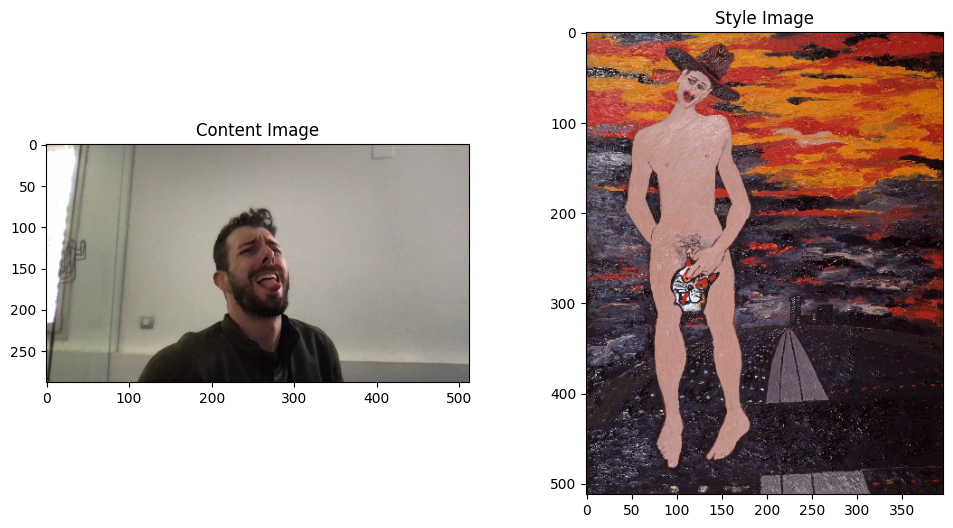

In [42]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

In [43]:
import tensorflow_hub as hub

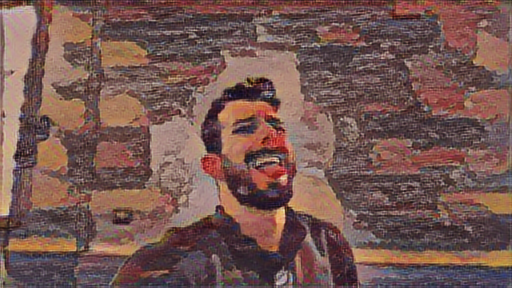

In [44]:
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)

## Artist

In [45]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image

import os
import random

In [46]:
#0.080, 0.054, 0.142

In [47]:
#positive = float(input("Insert your POSITIVE feeling fromn 0.00 to 1.00:"))
#neutral = float(input("Insert your NEUTRAL feeling fromn 0.00 to 1.00:"))
#negative = float(input("Insert your NEGATIVE feeling fromn 0.00 to 1.00:"))

In [48]:
artist = find_closest_artist(df_artist, 0.080, 0.054, 0.142)

In [49]:
images_directory = "../Images/WikiArt/"

In [50]:
def get_random_image_path(df_artist, artist, images_directory):
    # Filtrar el DataFrame df_artist por el artista obtenido
    artist_df = df_artist[df_artist['Artist'] == artist]

    # Obtener la lista de ID de las obras del artista
    artist_work_ids = artist_df['ID'].tolist()

    # Seleccionar un ID de obra aleatorio del artista
    random_work_id = random.choice(artist_work_ids)

    # Obtener el movimiento de la obra seleccionada
    movement = artist_df[artist_df['ID'] == random_work_id]['Movement'].values[0]

    # Construir la ruta de la imagen utilizando el ID de la obra y el movimiento
    image_path = os.path.join(images_directory, movement.replace(" ", "_"), random_work_id + ".jpg")
    
    return image_path

In [51]:
artist_path = get_random_image_path(df, artist, images_directory)

In [52]:
artist_path

'../Images/WikiArt/Cubism/5772829fedc2cb3880f82c16.jpg'

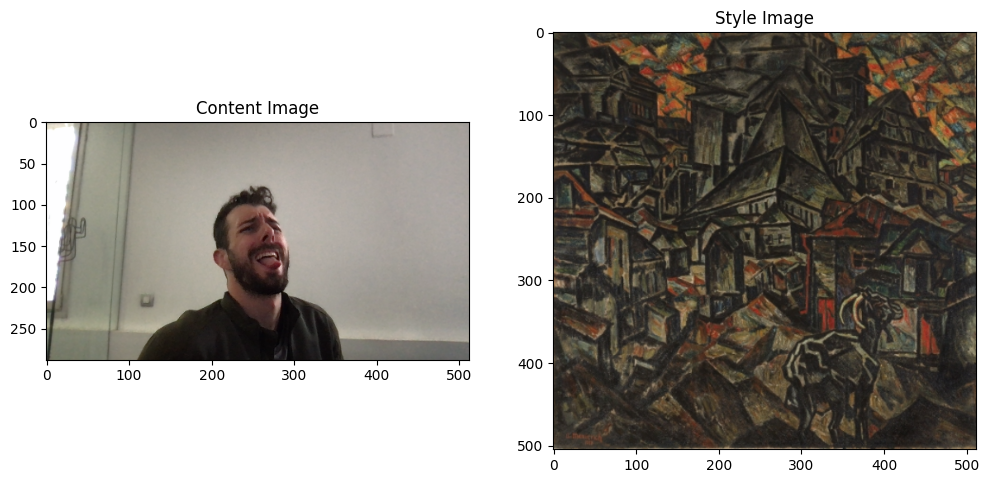

In [53]:
content_image = load_img(content_path)
style_image = load_img(artist_path)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

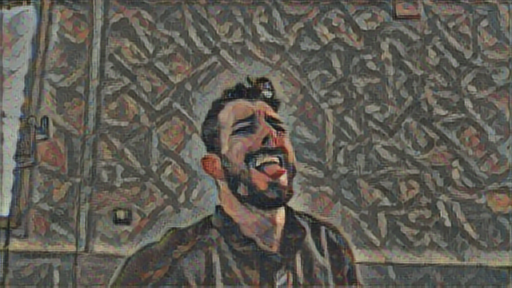

In [54]:
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)